# Written by Federica B. Bianco @fedhere
# Implemented and edited by Baiyue Cao (BC1561) @SPTKL
# for NYU CUSP PUI

- ### Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
- ### Choose the significance threshold
- ### Clearly state they Null and Alternate hypothesis
- ### Wrangle the data so that it is ready for your analysis.

In [24]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
from urllib.request import urlopen
import io

%pylab inline
data_url = urlopen('https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip')
df = pd.read_csv(io.BytesIO(data_url.read()), compression='zip', sep=',')

Populating the interactive namespace from numpy and matplotlib


In [21]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1


In [27]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,30613.000000,33573.000000
mean,767.952313,3215.375748,40.722388,-74.046067,3211.434397,40.721945,-74.045550,28300.428469,1980.348806,1.121645
std,4038.930644,33.843146,0.007892,0.010625,79.019466,0.007731,0.010726,1646.539891,9.983384,0.538774
min,61.000000,3183.000000,40.692640,-74.096937,152.000000,40.692640,-74.096937,14529.000000,1887.000000,0.000000
25%,248.000000,3187.000000,40.716540,-74.050389,3186.000000,40.716247,-74.049638,26275.000000,NaN,1.000000
50%,384.000000,3203.000000,40.721124,-74.043991,3202.000000,40.719586,-74.043117,29266.000000,NaN,1.000000
75%,676.000000,3225.000000,40.727224,-74.038526,3214.000000,40.727224,-74.038051,29521.000000,NaN,1.000000
max,485426.000000,3281.000000,40.752559,-74.032108,3474.000000,40.777507,-73.967510,29682.000000,2001.000000,2.000000


# IDEA:
### Tourists (notated as "customers" in the data set) pay for 24 hour pass or 3 hour pass use citibikes for longer durations than annual subscribers because tourists want to maximize their short term pass values. 

# NULL HYPOTHESIS:
## The ratio of customers biking for longer than or equal to 700 seconds of duration over customers biking for less than 700s of duration is larger or equal to the ratio of subscribers biking biking for longer than or equal to 700 seconds of duration over customers biking for less than 700s of duration

# _$H_0$_ : $\frac{C_{\mathrm{>= 700s}}}{C_{\mathrm{<700s}}} >= \frac{S_{\mathrm{>=700}}}{S_{\mathrm{<700s}}}$
# _$H_1$_ : $\frac{C_{\mathrm{>= 700s}}}{C_{\mathrm{<700s}}} < \frac{S_{\mathrm{>=700}}}{S_{\mathrm{<700s}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from July 2017

As shown above, I read the data set into a dataframe called "df", and I will collect the trip duration column and the usertype column to conduct further analysis

In [38]:
df = df[['tripduration', 'usertype']]
df['over_700s'] = df.tripduration >= 700
df.head(5)

,tripduration,usertype,over_700s
0,340,Subscriber,False
1,439,Subscriber,False
2,186,Subscriber,False
3,442,Subscriber,False
4,170,Subscriber,False


In [49]:
df.groupby(['over_700s','usertype']).size().unstack()

usertype,Customer,Subscriber
over_700s,,
False,685,24919
True,1943,6026


## Add visualization here

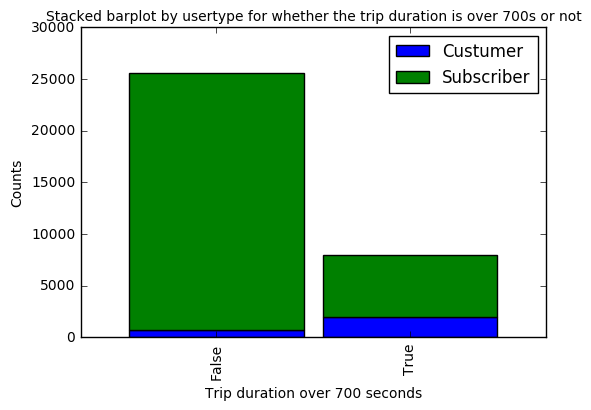

In [67]:
ax1 = pl.subplot()
byusertype = df.groupby(['over_700s','usertype']).size().unstack()
byusertype.columns = ['Custumer', 'Subscriber']
byusertype.plot(kind = 'bar',stacked = True, ax = ax1, width = 0.9)
ax1.set_xlabel('Trip duration over 700 seconds', fontsize=10)
ax1.set_ylabel('Counts', fontsize=10)
ax1.set_title('Stacked barplot by usertype for whether the trip duration is over 700s or not', fontsize=10)

$Z = \frac{\mu_{pop} - \mu_{sample}}{\sigma / \sqrt{N}} $

In [ ]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_w, weekend_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z = zscore(weekend_w, weekend_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z)